# SmartBeds - Evolución de una crisis

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador

In [1]:
%matplotlib inline
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #%matplotlilib.pyplot como plt
import mpl_toolkits.mplot3d #Matplotlib 3d
import pickle as pk #Pikcle as pk

### Funciones

In [2]:
def start_end(datosPartHour):
    MIN5 = 300 #Segundos de 5 minutos
    # Horas de inicio y final de cada crisis
    inicio = None
    final  = None

    #Cálculo del comienzo y del final
    b = False
    for index,row in datosPartHour.iterrows():
        if not b and row['target']:
            inicio = row['DateTime']
        elif b and not row['target']:
            final = row['DateTime']-pd.to_timedelta(1,unit='s') #Segundo anterior
        b = row['target']

    assert not(inicio is None) and not(final is None), 'No hay inicio o final'

    inicio_5 = inicio+pd.to_timedelta(MIN5,unit='s')
    final_5 = final-pd.to_timedelta(MIN5,unit='s')
    return inicio, inicio_5, final_5, final

In [3]:
def dibujado(data_raw,data,col='P1',title=''):
    global inicio, inicio_5, final_5, final
    
    plt.figure(figsize=(128,8))
    
    aCrt = data['DateTime'].map(lambda x: x < inicio)
    dCrt = data['DateTime'].map(lambda x: x > final)
    fCrt = (data['DateTime'].map(lambda x: x >= inicio)) & (data['DateTime'].map(lambda x: x <= inicio_5))
    lCrt = (data['DateTime'].map(lambda x: x >= final_5)) & (data['DateTime'].map(lambda x: x <= final))
    mCrt = (data['DateTime'].map(lambda x: x > inicio_5)) & (data['DateTime'].map(lambda x: x < final_5))
    
    antes = data[aCrt]
    despues = data[dCrt]
    first5 = data[fCrt]
    last5 = data[lCrt]
    med = data[mCrt]
    
    antes_r = data_raw[aCrt]
    despues_r = data_raw[dCrt]
    first5_r = data_raw[fCrt]
    last5_r = data_raw[lCrt]
    med_r = data_raw[mCrt]
    
    colors = ['navy','gold','k','tomato','darkgreen','deeppink','maroon','limegreen','chocolate','aqua']
    states = [antes_r,antes,despues_r,despues,first5_r,first5,med_r,med,last5_r,last5]
    pos = ['Before Raw','Before','After Raw', 'After','First 5 min Raw','First 5 min',
           'Middle minunites Raw','Middle minunites','Last 5 min Raw','Last 5 min']
    
    for i in range(len(states)):
        X = states[i]['DateTime']
        Y = states[i][col]
        plt.plot(X,Y,c=colors[i],linewidth=1.0)
    plt.title(title)
    plt.grid()
    
    plt.legend(tuple(pos), loc='best')

### Carga de los datos

In [4]:
with open('data/datos_raw.pdd','rb') as f:
    datos_raw = pk.load(f)
with open('data/datos20Min.pdd','rb') as f:
    datosPartHour = pk.load(f)
    
min_ = np.min(datosPartHour['DateTime'])
max_ = np.max(datosPartHour['DateTime'])
datos_raw = datos_raw[datos_raw['DateTime'].map(lambda x: (x >= min_) & (x <= max_))]
datos_raw.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
2095691,2018-11-10 03:10:00,6.185567,32.989691,25.773196,31.958763,31.958763,20.618557,0.0,0.0,0.0,0.0,0.0,0.0,False
2095692,2018-11-10 03:10:00,7.216495,34.020619,25.773196,31.958763,32.989691,21.649485,0.0,0.0,0.0,0.0,0.0,0.0,False
2095695,2018-11-10 03:10:01,7.216495,32.989691,24.742268,30.927835,31.958763,20.618557,0.0,0.0,0.0,0.0,0.0,0.0,False
2095694,2018-11-10 03:10:01,7.216495,34.020619,25.773196,31.958763,32.989691,21.649485,0.0,0.0,0.0,0.0,0.0,0.0,False
2095693,2018-11-10 03:10:01,7.216495,32.989691,24.742268,30.927835,31.958763,20.618557,0.0,0.0,0.0,0.0,0.0,0.0,False


In [5]:
inicio, inicio_5, final_5, final = start_end(datosPartHour)

### Dibujado

In [6]:
cols = list()
for i in range(len(datosPartHour.columns)-2):
    cols.append('P'+str(i+1))

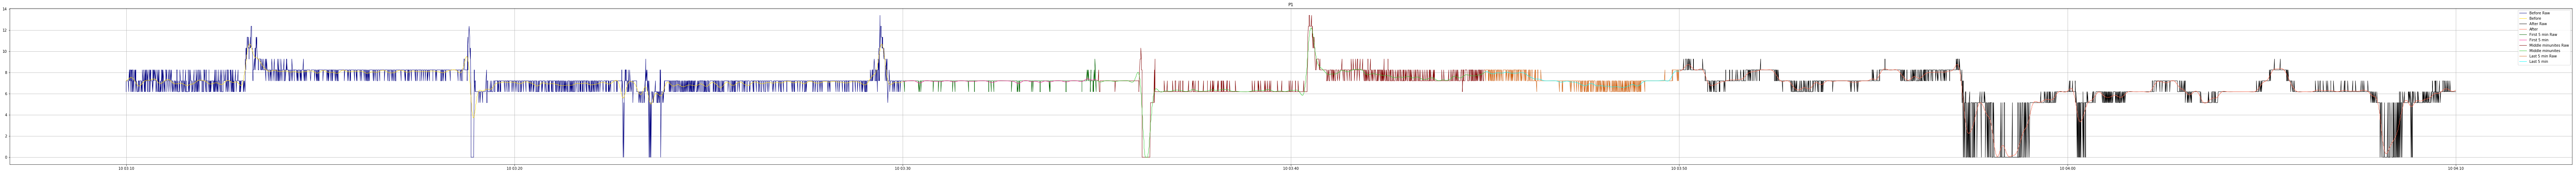

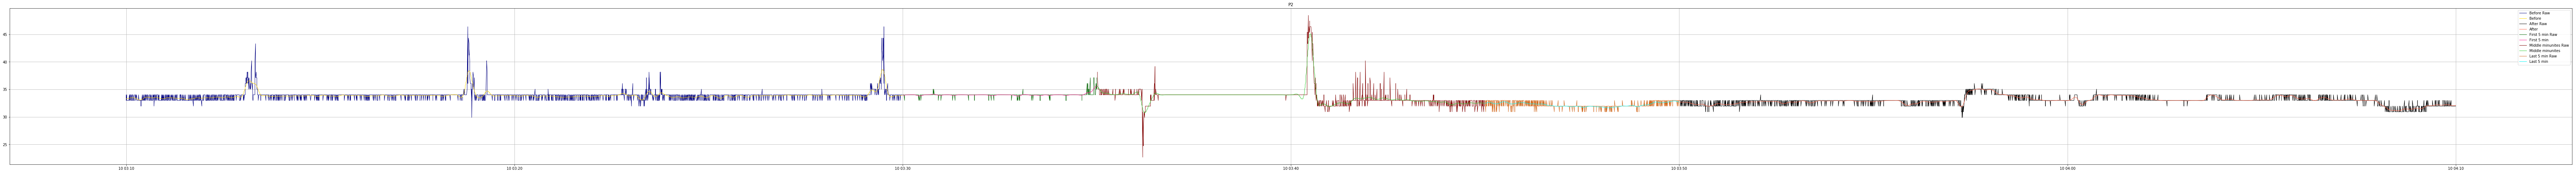

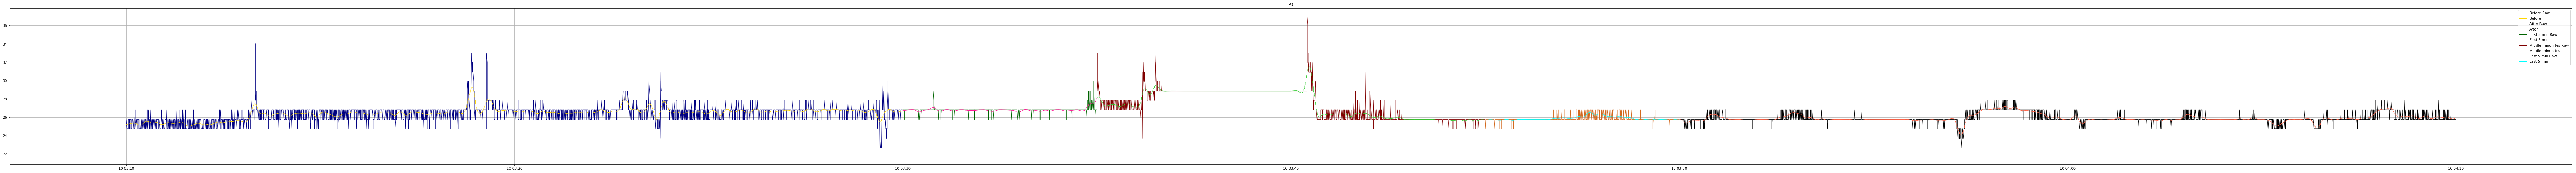

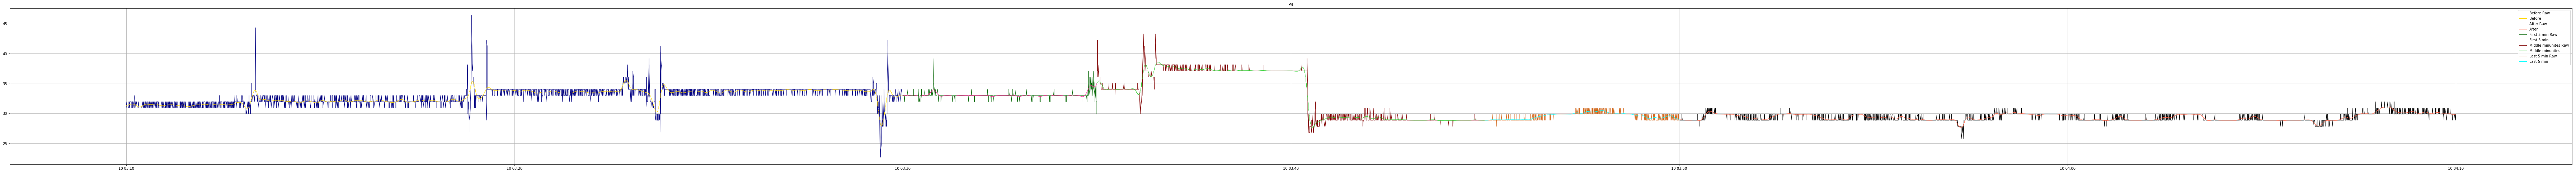

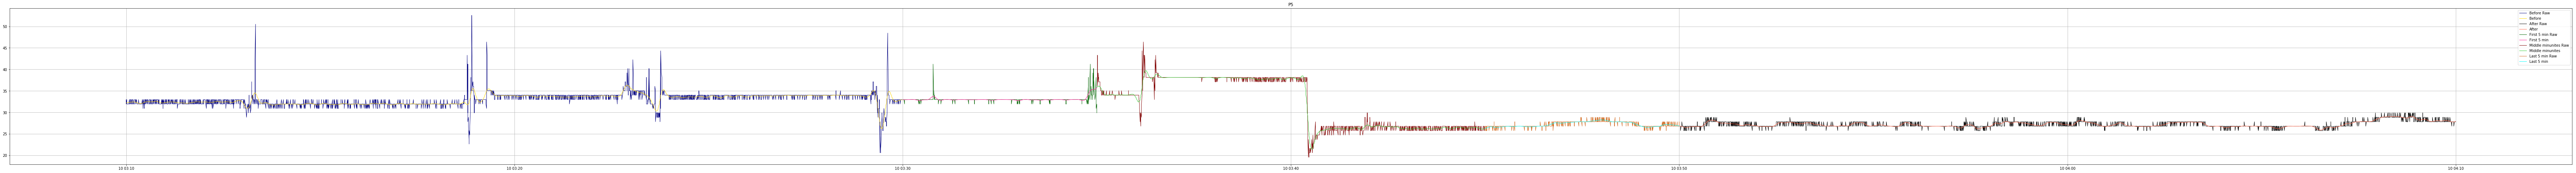

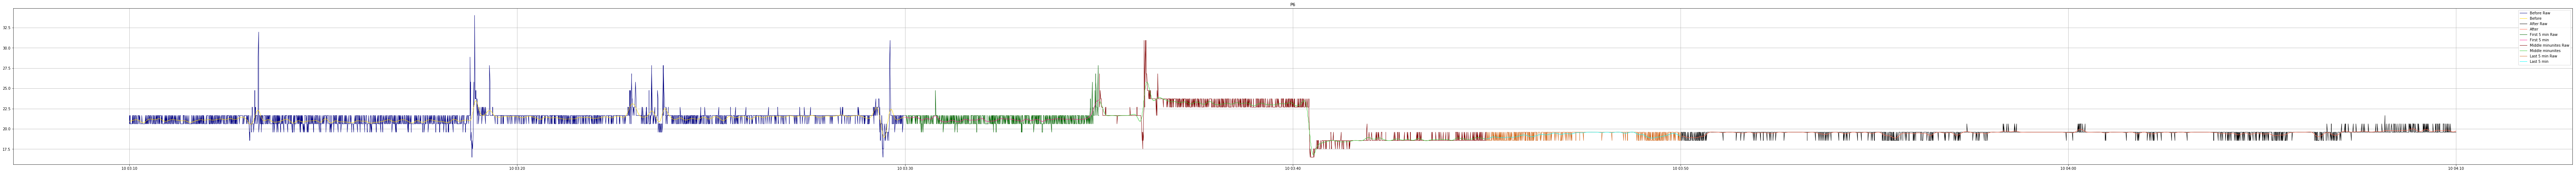

In [7]:
for i in cols:
    dibujado(datos_raw,datosPartHour,col=i,title=i)
    plt.savefig('images/'+i+"-bw.svg")